In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models

import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import cv2
import os, sys
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

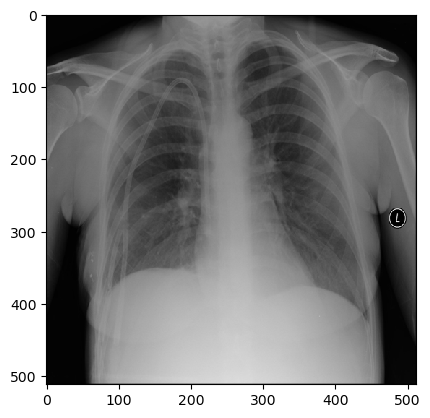

In [126]:
test_img = Image.open('/home/raza.imam/Documents/HC701B/Project/data/TB_data/training/Normal/Normal-1.png')
test_img_data = np.asarray(test_img)
plt.imshow(test_img)

transform = transforms.Compose([
 transforms.Resize(224),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

# standard ImageNet normalization
transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )

transformed_img = transform(test_img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


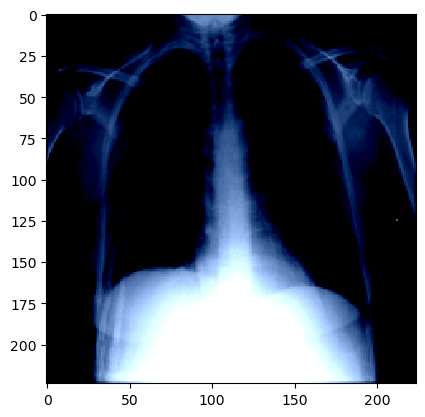

In [127]:
plt.imshow(input_img[0].permute(1,2,0))

In [128]:
model = torch.load('/home/raza.imam/Documents/HC701B/Project/models/vit_base_patch16_224_in21k_test-accuracy_0.96_chest.pth')
model = model.eval()

In [129]:

output = model(input_img.cuda())
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)
print(prediction_score)
pred_label_idx.squeeze_()

tensor([[0.9490]], device='cuda:0', grad_fn=<TopkBackward>)


tensor(0, device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])


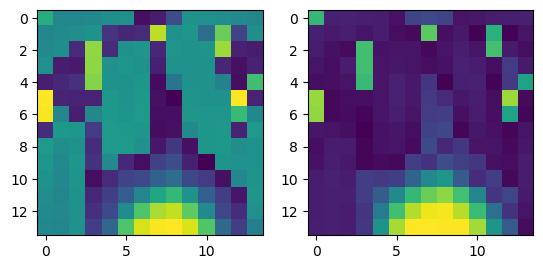

In [132]:
A, B, C = None, None, None
def hooker(a ,b ,c):
    i = -1
    # print(a, b, c)
    # print()
    # print(b[0][0][:-1][:,-1].reshape(14, -1))
    plt.subplot(121)
    plt.imshow(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu())
    plt.subplot(122)
    plt.imshow(c[0][:-1][:,i].reshape(14, -1).detach().cpu())
    # print(c.shape)
    
    
    # A, B, C = a, b, c
    
    
model.blocks[-1].attn.register_forward_hook(hooker)
output = model(input_img.cuda())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])
torch.Size([14, 14])


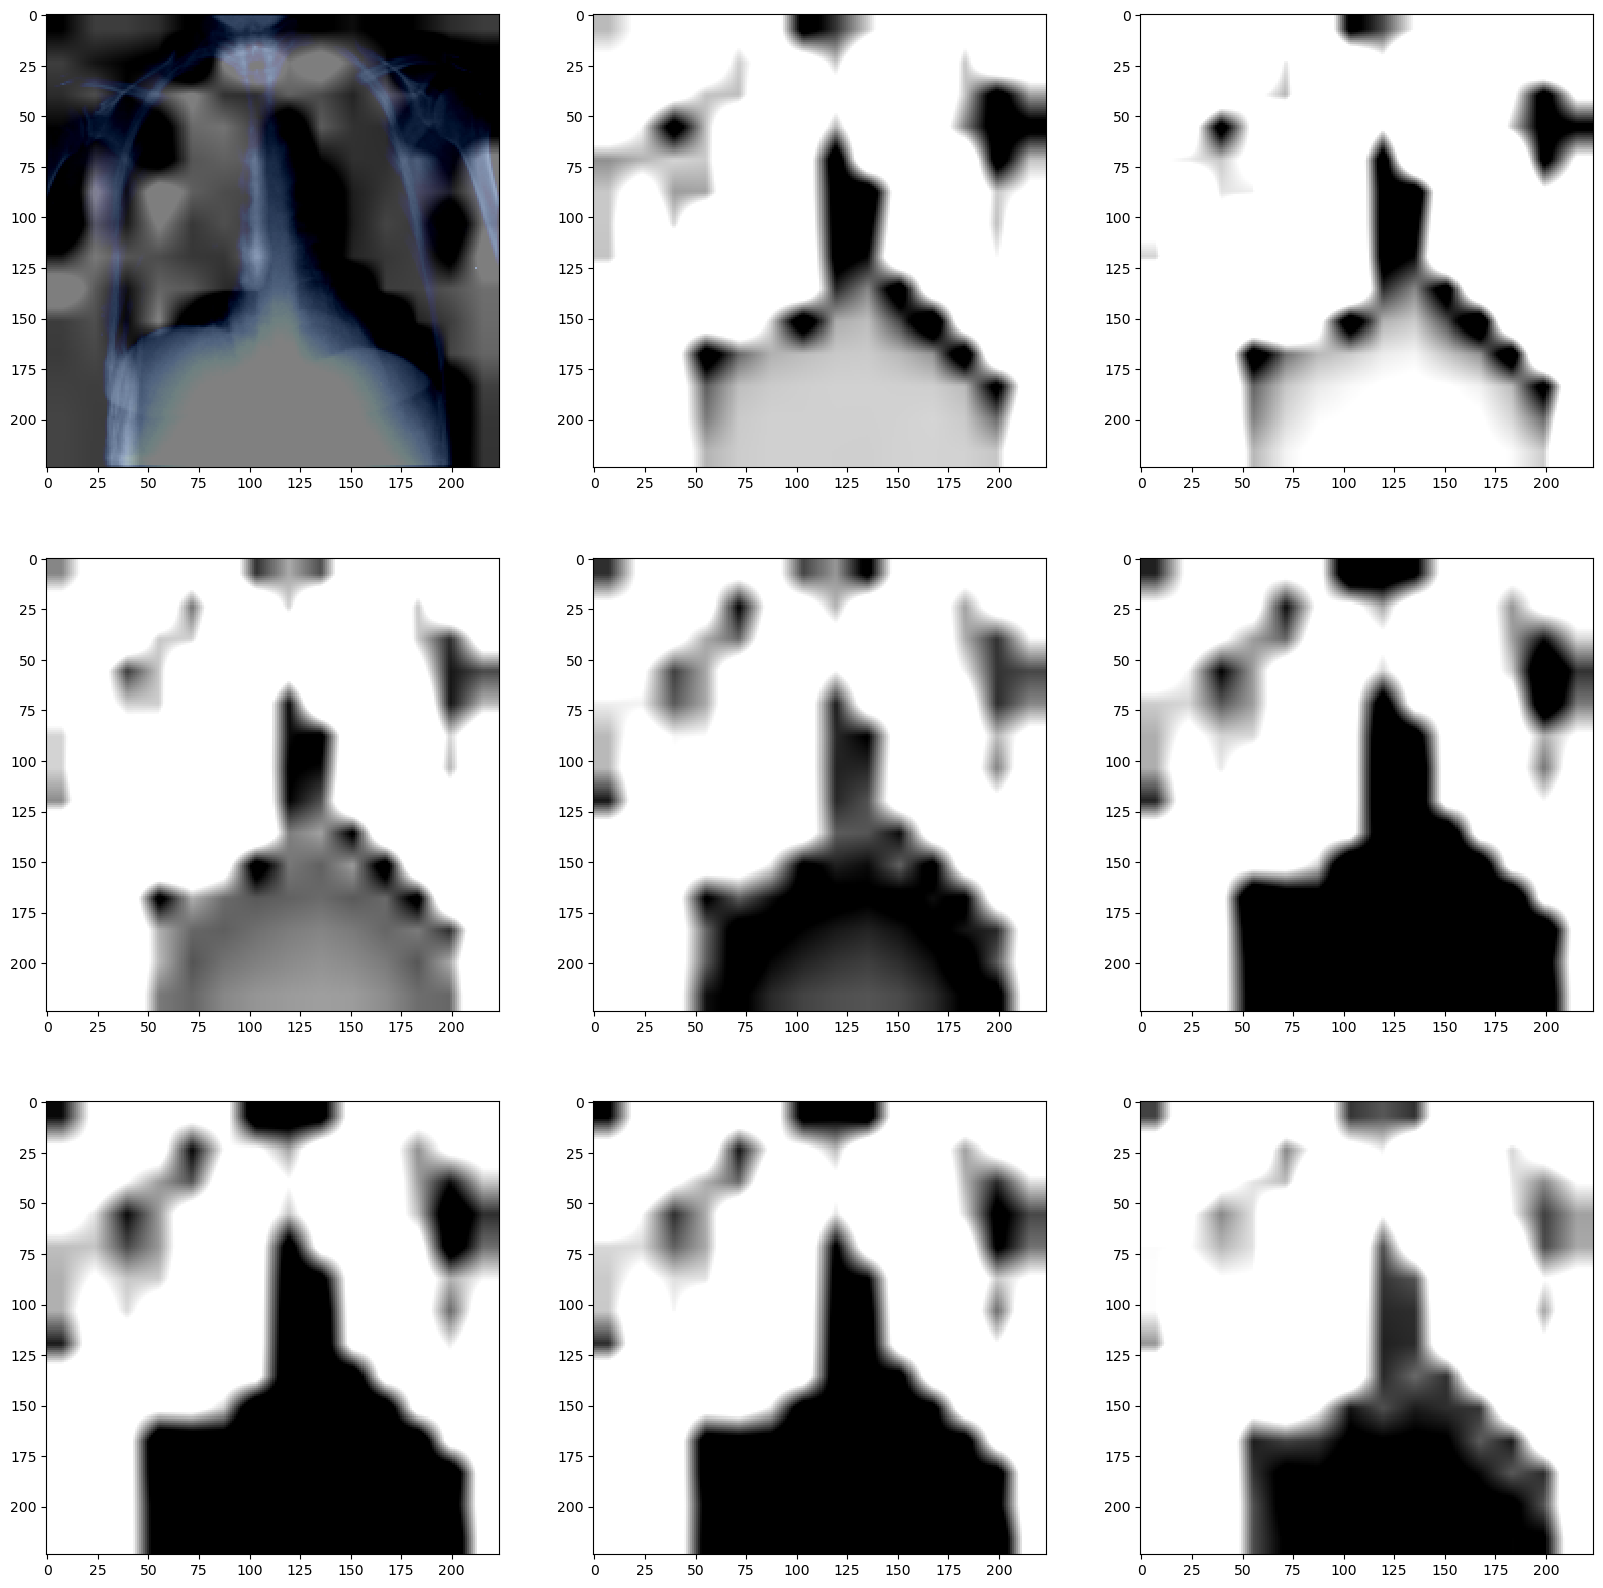

In [131]:

def hooker1(a ,b ,c):
    i = -2
    plt.subplot(331)
    # plt.imshow(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu())
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    # plt.subplot(132)
    # plt.imshow(c[0][:-1][:,i].reshape(14, -1).detach().cpu())
    # plt.subplot(133)
    plt.imshow(input_img[0].permute(1,2,0))
    plt.imshow(resized, alpha = 0.5)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    


def hooker2(a ,b ,c):
    i = -2
    plt.subplot(332)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    


def hooker3(a ,b ,c):
    i = -2
    plt.subplot(333)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    


def hooker4(a ,b ,c):
    i = -2
    plt.subplot(334)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    


def hooker5(a ,b ,c):
    i = -2
    plt.subplot(335)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    


def hooker6(a ,b ,c):
    i = -2
    plt.subplot(336)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)


def hooker7(a ,b ,c):
    i = -2
    plt.subplot(337)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    



def hooker8(a ,b ,c):
    i = -2
    plt.subplot(338)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    


def hooker9(a ,b ,c):
    i = -2
    plt.subplot(339)
    rgb_img = cv2.cvtColor(np.float32(b[0][0][:-1][:,i].reshape(14, -1).detach().cpu()),cv2.COLOR_GRAY2RGB)
    resized = cv2.resize(rgb_img, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized)
    print(c[0][:-1][:,i].reshape(14, -1).detach().cpu().shape)    



hook_list = [hooker1, hooker2, hooker3, hooker4, hooker5, hooker6, hooker7,hooker8,hooker9]


for i in range(9):
    model.blocks[i].attn.register_forward_hook(hook_list[i])


plt.figure(figsize=(20,20))
output = model(input_img.cuda())